In [1]:

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

data = pd.read_csv('C:/Users/HOANG NAM/Desktop/heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

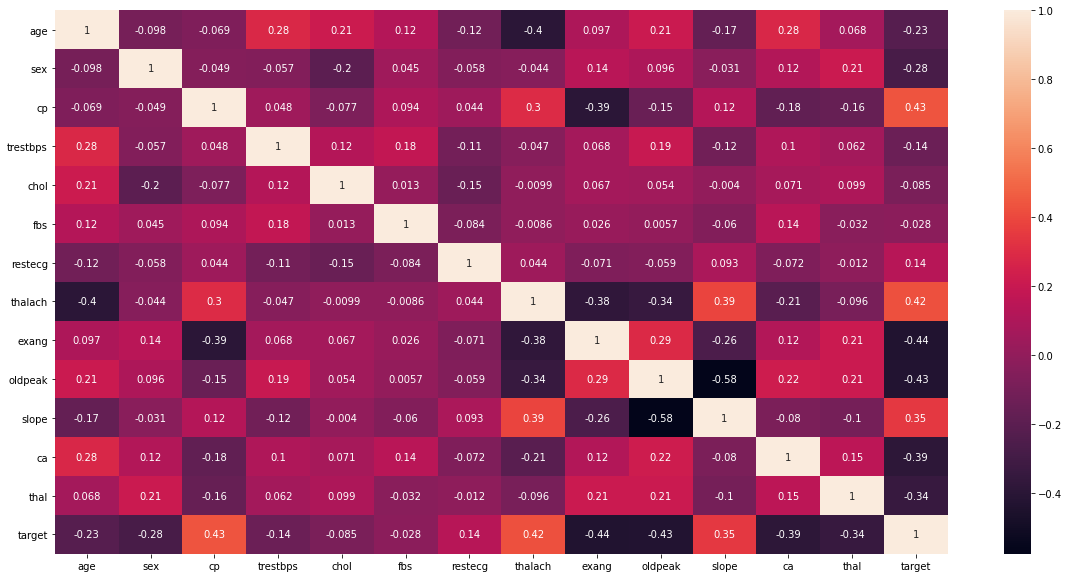

In [3]:
#Khảo sát độ tương đồng giữa các cột với nhau
plt.figure (figsize=(20,10))
sns.heatmap(data.corr( method='pearson' ),annot=True)


In [5]:
#Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
#phần chứa riêng thuộc tính quyết định.
features = data.drop( 'target' , axis=1)
y = data[ 'target' ]


In [6]:
#Chuyển đổi các cột không phải dạng số về dạng one-hot vector
X=pd.get_dummies ( features , columns =features.select_dtypes(exclude=['int64']).columns)
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,...,oldpeak_3.2,oldpeak_3.4,oldpeak_3.5,oldpeak_3.6,oldpeak_3.8,oldpeak_4.0,oldpeak_4.2,oldpeak_4.4,oldpeak_5.6,oldpeak_6.2
0,63,1,3,145,233,1,0,150,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37,1,2,130,250,0,1,187,0,0,...,0,0,1,0,0,0,0,0,0,0
2,41,0,1,130,204,0,0,172,0,2,...,0,0,0,0,0,0,0,0,0,0
3,56,1,1,120,236,0,1,178,0,2,...,0,0,0,0,0,0,0,0,0,0
4,57,0,0,120,354,0,1,163,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,0,0,0,0,0,0,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1,...,0,0,0,0,0,0,0,0,0,0
300,68,1,0,144,193,1,1,141,0,1,...,0,1,0,0,0,0,0,0,0,0
301,57,1,0,130,131,0,1,115,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [10]:
#Xây dựng cây ID3
clf=tree.DecisionTreeClassifier(criterion="entropy", random_state=0) 
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Accuracy: 0.7868852459016393
Report:               precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [12]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

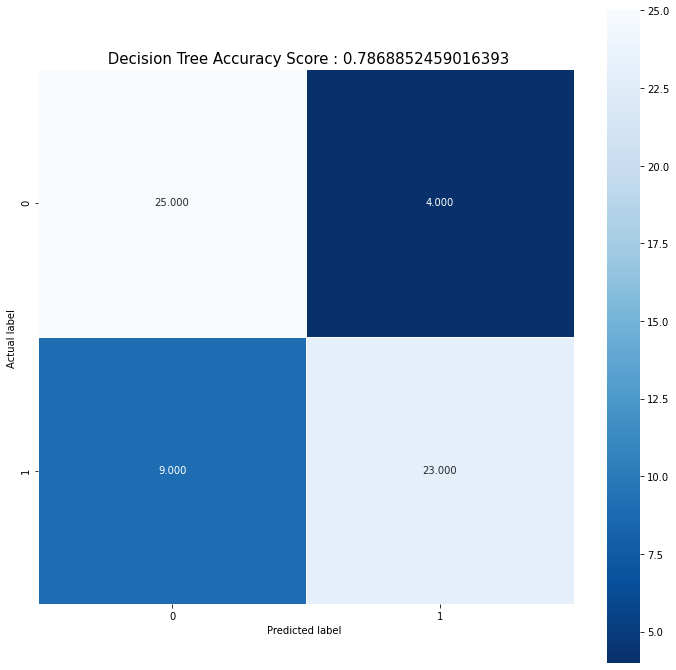

In [13]:
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);


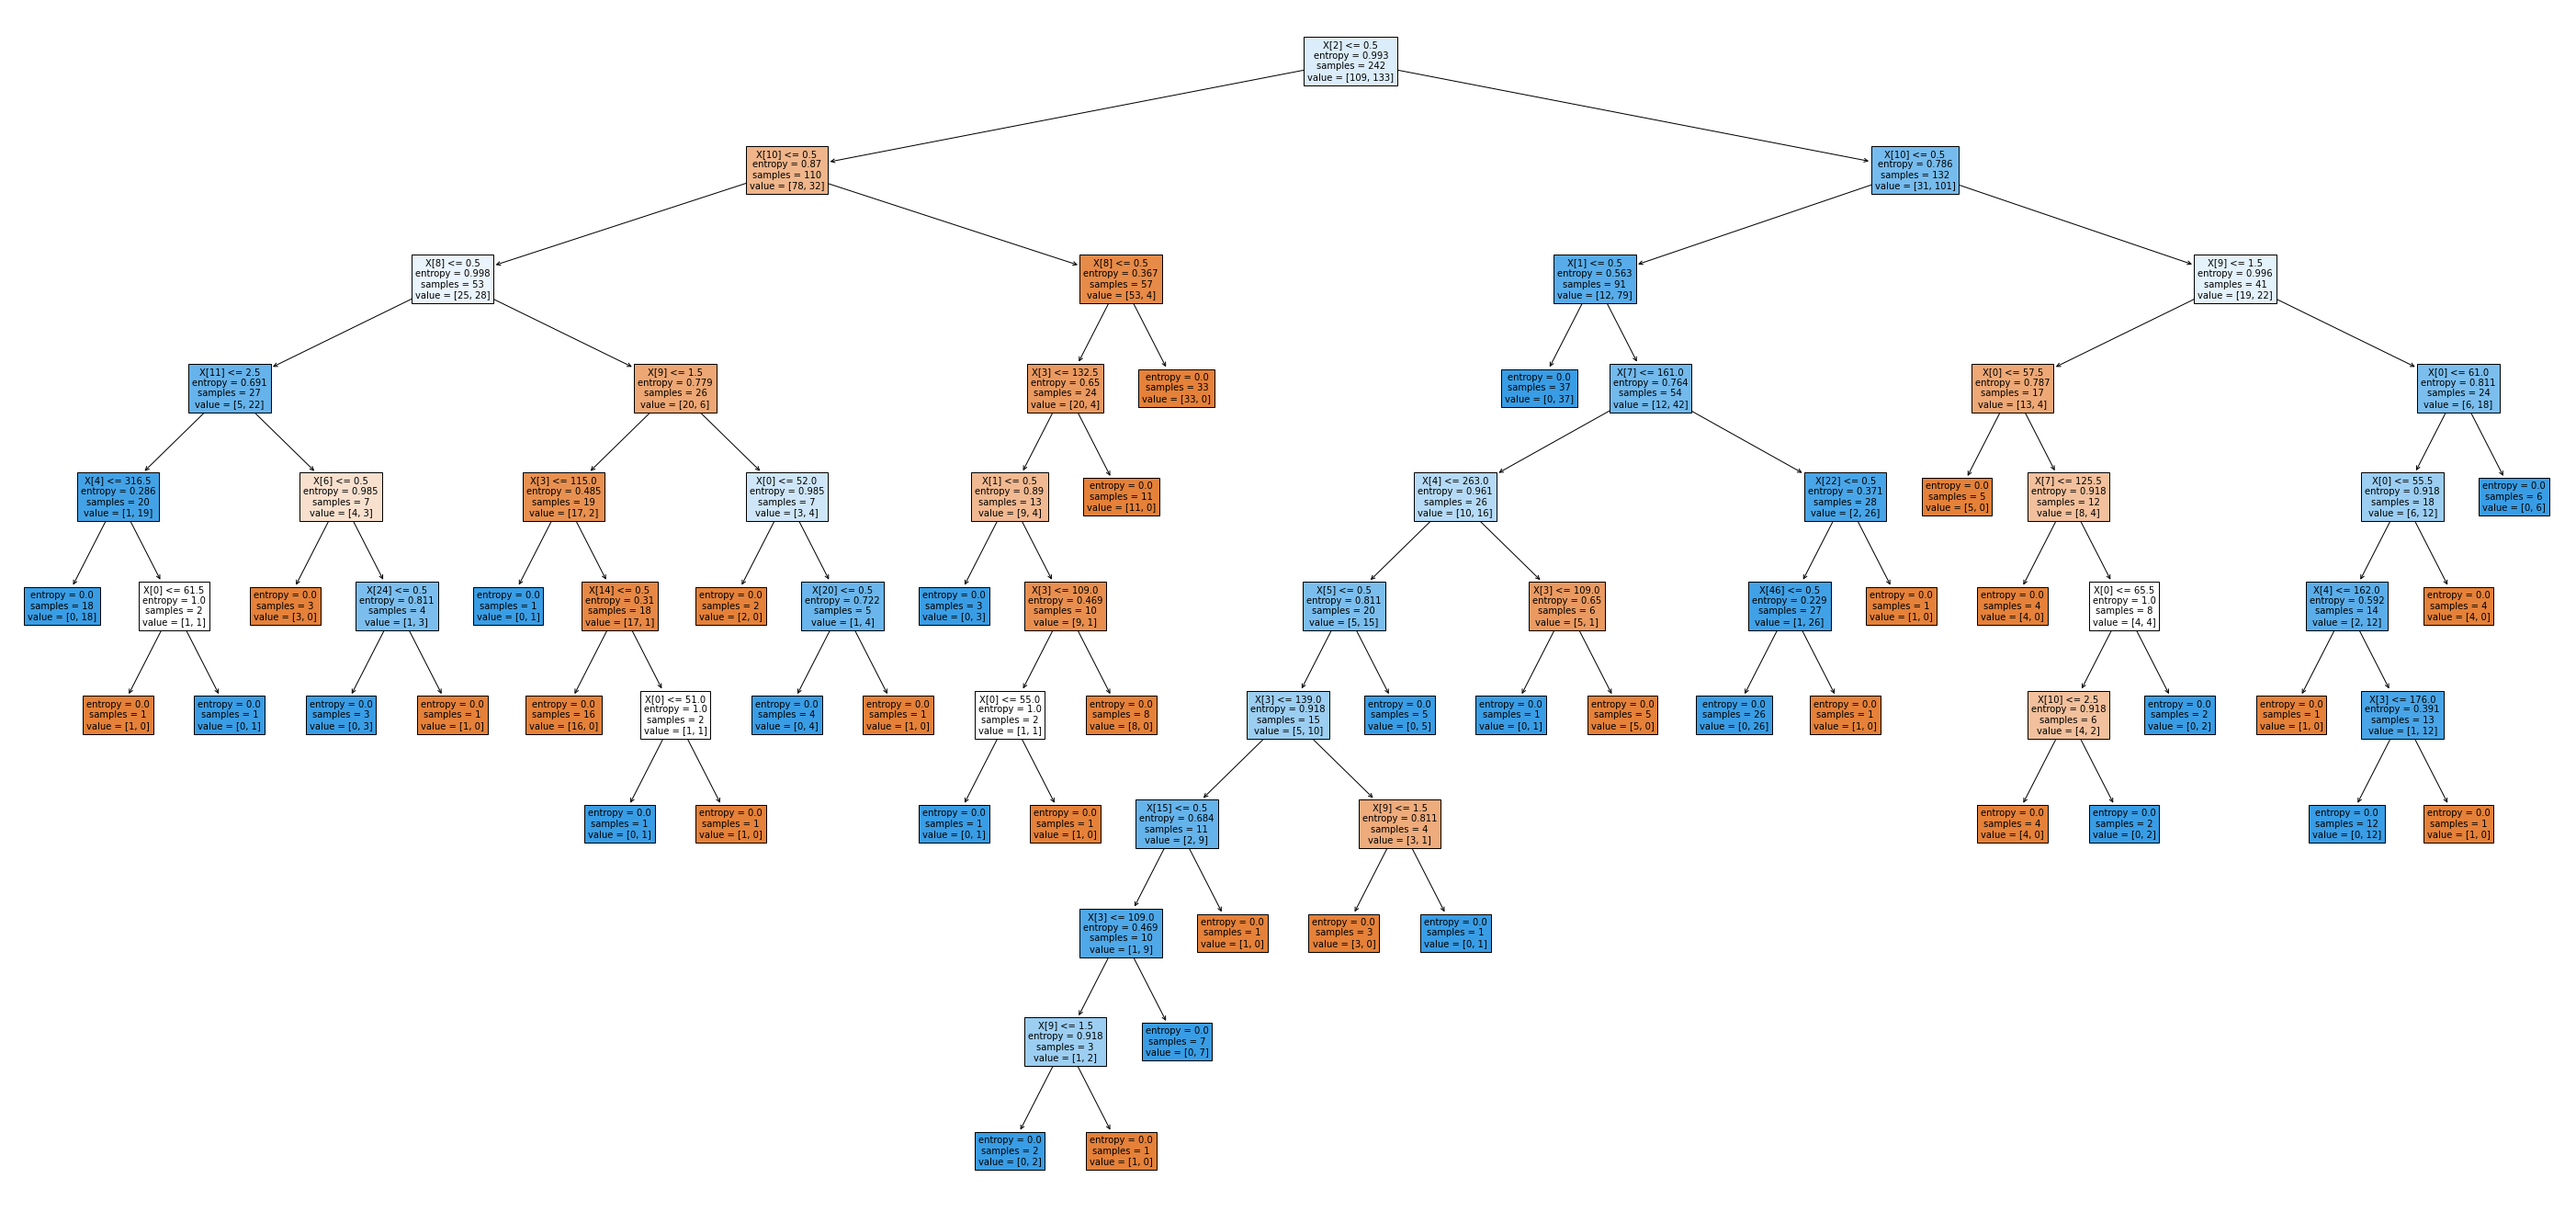

In [14]:
#vẽ cây ID3
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [18]:
#Xây dựng cây CART
clf=tree.DecisionTreeClassifier(criterion="gini", random_state=0) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.7868852459016393
Report:               precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



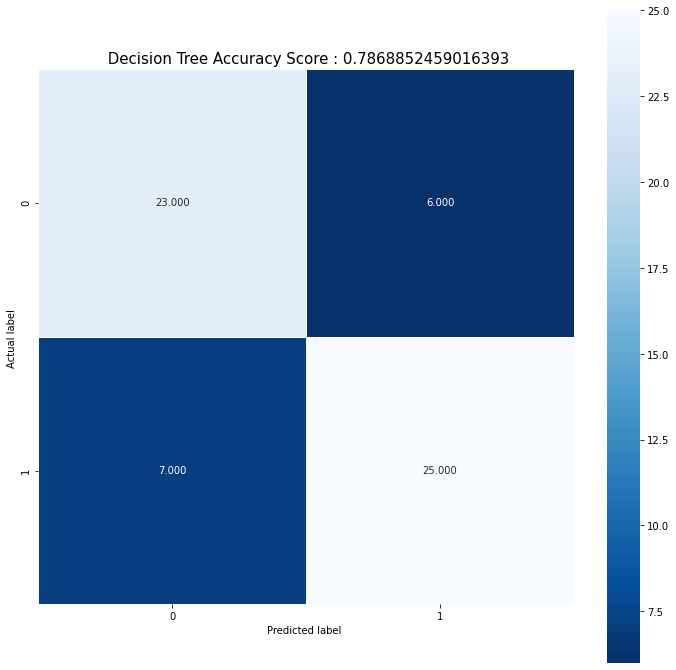

In [20]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);

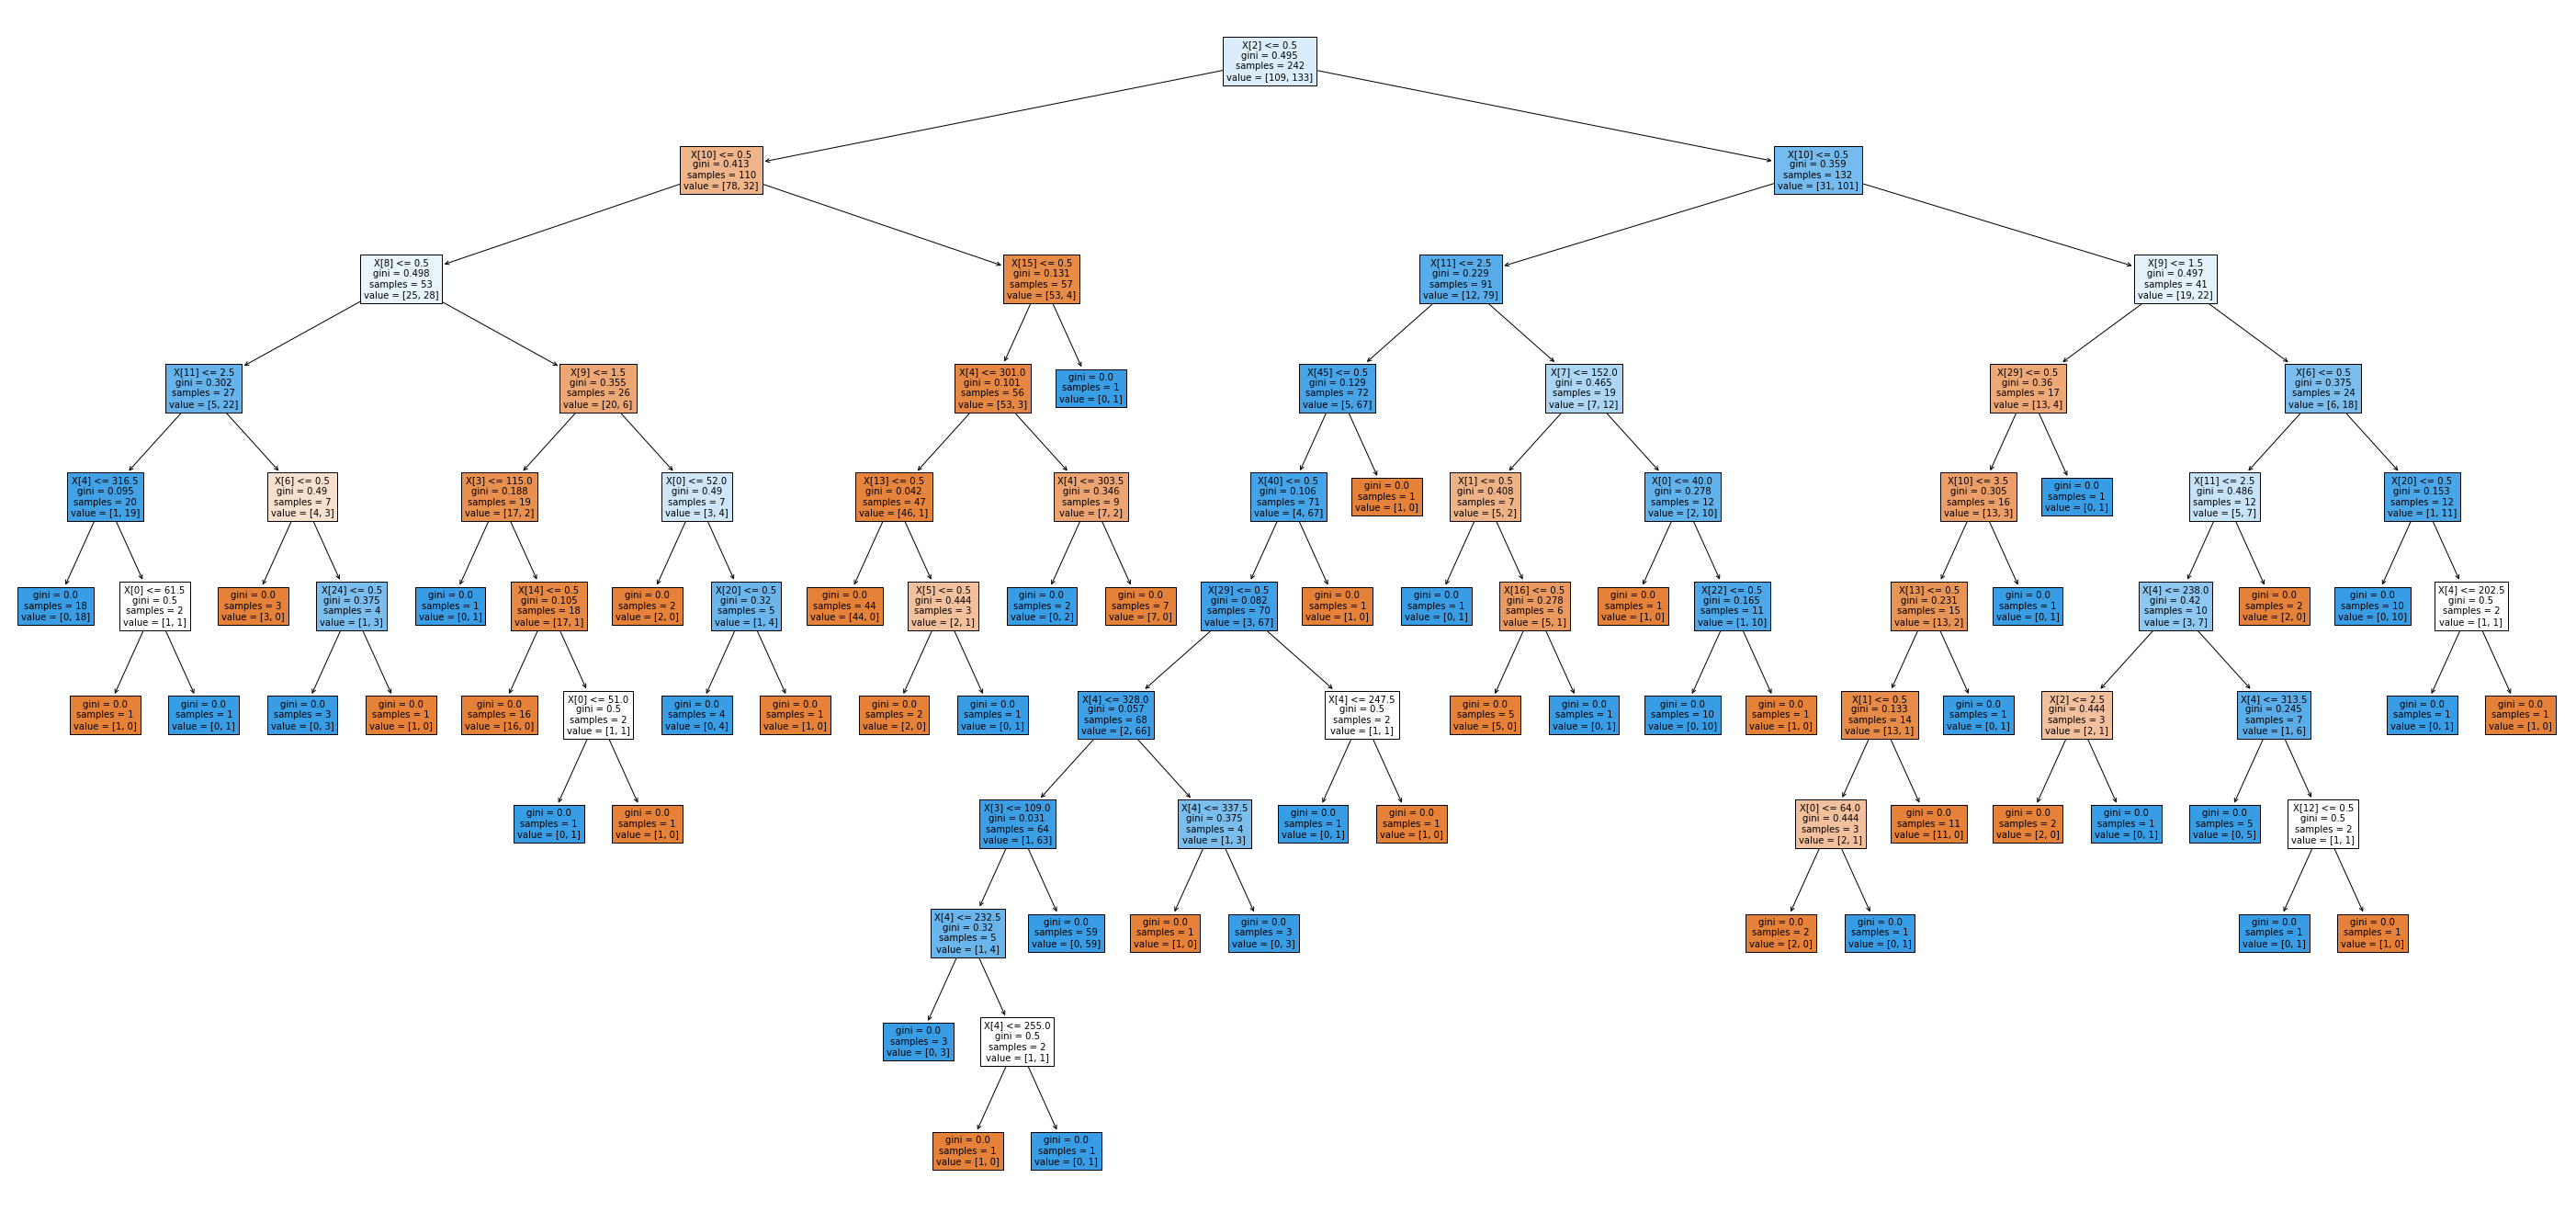

In [21]:
#vẽ cây CART
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [15]:
#Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


In [16]:
#Tính toán các giá trị của mô hình
bayes_score = metrics.accuracy_score(y_test, bayes_pred) 
print("Accuracy", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))


Accuracy 0.6065573770491803
Report:               precision    recall  f1-score   support

           0       0.69      0.31      0.43        29
           1       0.58      0.88      0.70        32

    accuracy                           0.61        61
   macro avg       0.64      0.59      0.56        61
weighted avg       0.64      0.61      0.57        61



Text(0.5, 1.0, 'Naive Bayes Accuracy: 0.6065573770491803')

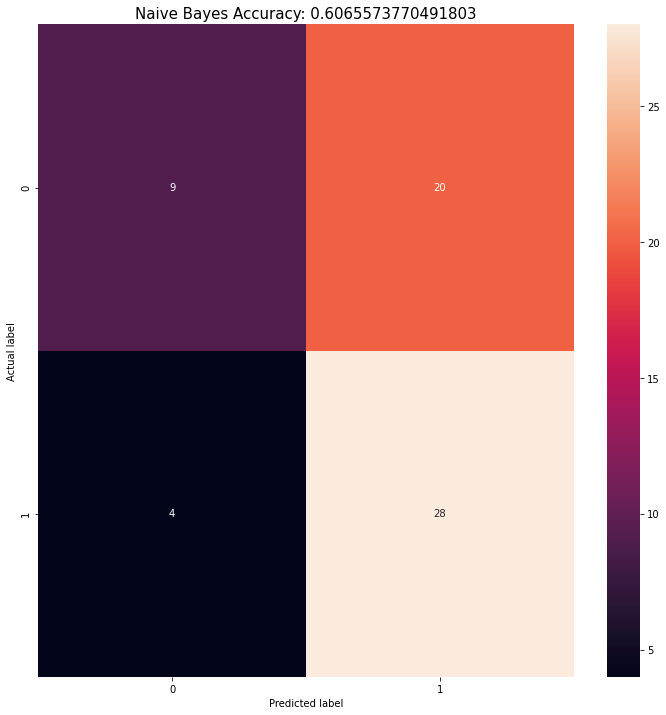

In [17]:
#ma trận nhầm lẫn bằng đồ thị heatmap.
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
fig = plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".0f"); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy: {0}'.format(bayes_score) 
plt.title(title,size=15)
